In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from nistats.design_matrix import _make_drift

# Drifts generated in nistats
 Nistatis is a package for modeling and statistical inference on fMRI data in Python.
 
 Let's check cosine drifts first:

[0, 200, -1, 1.5]

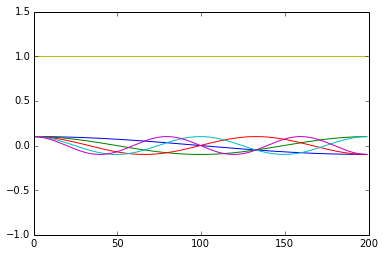

In [15]:
drifts1 = _make_drift('cosine', frame_times=np.arange(200), period_cut=64)
plt.plot(drifts1[0])
plt.axis([0,200,-1,1.5])

Now polynomial drifts

[0, 200, -1, 1.5]

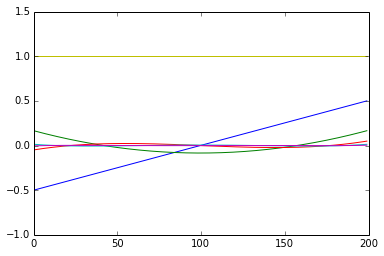

In [18]:
drifts2 = _make_drift('polynomial', frame_times=np.arange(200), order=5)
plt.plot(drifts2[0])
plt.axis([0,200,-1,1.5])

# Drifts that we generate in pyhrf
They are polynomial

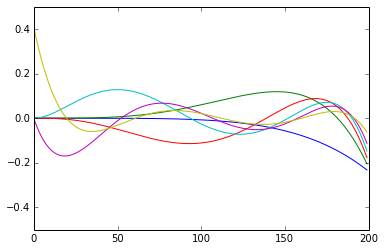

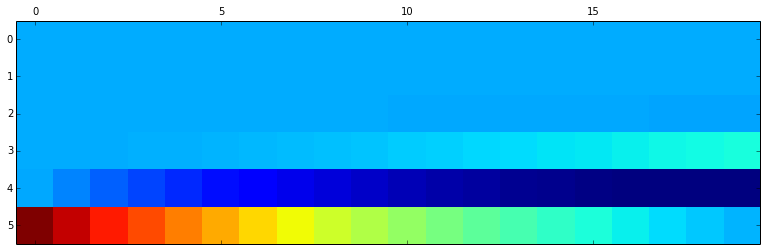

In [49]:
from pyhrf.vbjde.vem_tools import PolyMat
drifts3 = PolyMat(200, 5, 1)
plt.plot(drifts3)
plt.axis([0,200,-0.5,0.5])
plt.matshow(drifts3[:20, :].T)

## What if we orthogonalize them? 

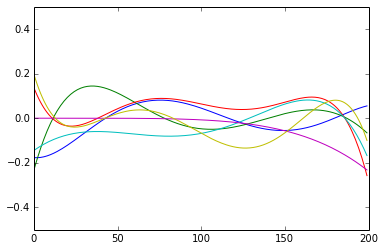

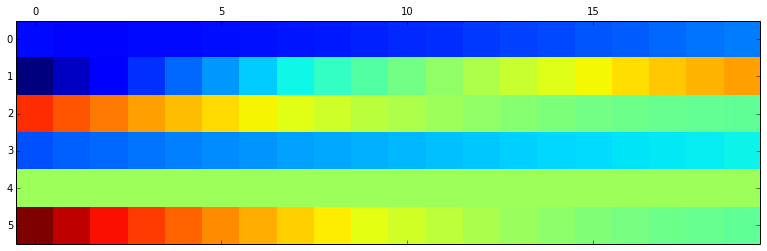

In [47]:
import scipy as sp
drifts4 = np.array(sp.linalg.orth(drifts3))
plt.plot(drifts4)
plt.axis([0,200,-0.5,0.5])
plt.matshow(drifts4[:20, :].T)

In [26]:
print drifts1[0].shape
print drifts2[0].shape
print drifts3.shape

(200, 6)
(200, 6)
(200, 6)


# Are they orthogonal?
Orthogonal means:  $\langle x, y \rangle = 0$, so here $$P^T P = w Id$$ being $w$ a vector of weights.

# Are they orthonormal?
Let $\mathcal{V}$ be an inner-product space. A set of vectors

   $$ \left\{ u_1 , u_2 , \ldots , u_n , \ldots \right\} \in \mathcal{V} $$

is called orthonormal if and only if

   $$ \forall i,j : \langle u_i , u_j \rangle = \delta_{ij} $$

where $\delta_{ij}$ , is the Kronecker delta and $\langle \cdot , \cdot \rangle$ is the inner product defined over $\mathcal{V}$.

In our case, $$P^T P = Id$$

In [35]:
drifts1[0].T.dot(drifts1[0])


array([[  1.00000000e+00,  -4.21537805e-16,   1.00613962e-16,
         -1.38777878e-16,   9.19403442e-17,  -1.38777878e-17],
       [ -4.21537805e-16,   1.00000000e+00,  -3.29597460e-17,
          1.68268177e-16,  -6.93889390e-17,   9.29811783e-16],
       [  1.00613962e-16,  -3.29597460e-17,   1.00000000e+00,
         -8.67361738e-18,   7.28583860e-17,  -4.71844785e-16],
       [ -1.38777878e-16,   1.68268177e-16,  -8.67361738e-18,
          1.00000000e+00,   5.55111512e-17,   1.02695630e-15],
       [  9.19403442e-17,  -6.93889390e-17,   7.28583860e-17,
          5.55111512e-17,   1.00000000e+00,  -1.58206781e-15],
       [ -1.38777878e-17,   9.29811783e-16,  -4.71844785e-16,
          1.02695630e-15,  -1.58206781e-15,   2.00000000e+02]])

In [36]:
drifts2[0].T.dot(drifts2[0])


array([[  1.68341709e+01,   1.05887521e-14,   9.77343206e-15,
         -3.51801921e-15,   1.93040028e-14,  -7.21644966e-15],
       [  1.05887521e-14,   1.13347221e+00,  -3.79904441e-15,
         -1.98539102e-15,   6.11598445e-16,   1.22124533e-15],
       [  9.77343206e-15,  -3.79904441e-15,   7.35836732e-02,
          8.96093096e-16,   3.89797786e-16,  -1.11022302e-16],
       [ -3.51801921e-15,  -1.98539102e-15,   8.96093096e-16,
          4.71716417e-03,   1.50641760e-15,  -8.03523914e-15],
       [  1.93040028e-14,   6.11598445e-16,   3.89797786e-16,
          1.50641760e-15,   3.00613260e-04,  -2.17499629e-14],
       [ -7.21644966e-15,   1.22124533e-15,  -1.11022302e-16,
         -8.03523914e-15,  -2.17499629e-14,   2.00000000e+02]])

In [37]:
drifts3.T.dot(drifts3)

array([[  1.00000000e+00,  -6.59194921e-17,  -3.60822483e-16,
          1.21430643e-16,  -1.63064007e-16,   1.12757026e-16],
       [ -6.59194921e-17,   1.00000000e+00,  -2.42861287e-17,
          5.55111512e-17,  -4.51028104e-17,   3.98986399e-17],
       [ -3.60822483e-16,  -2.42861287e-17,   1.00000000e+00,
          2.04697370e-16,  -3.38271078e-17,   8.32667268e-17],
       [  1.21430643e-16,   5.55111512e-17,   2.04697370e-16,
          1.00000000e+00,   2.66280054e-16,  -4.77048956e-18],
       [ -1.63064007e-16,  -4.51028104e-17,  -3.38271078e-17,
          2.66280054e-16,   1.00000000e+00,   1.90169061e-16],
       [  1.12757026e-16,   3.98986399e-17,   8.32667268e-17,
         -4.77048956e-18,   1.90169061e-16,   1.00000000e+00]])

In [50]:
drifts4.T.dot(drifts4)n

array([[  1.00000000e+00,   9.71445147e-17,  -2.96637714e-16,
         -5.20417043e-18,   4.68375339e-17,   1.78676518e-16],
       [  9.71445147e-17,   1.00000000e+00,  -3.74700271e-16,
          2.15973073e-16,   5.89805982e-17,   5.03069808e-17],
       [ -2.96637714e-16,  -3.74700271e-16,   1.00000000e+00,
          1.11022302e-16,  -2.08166817e-17,  -8.76035355e-17],
       [ -5.20417043e-18,   2.15973073e-16,   1.11022302e-16,
          1.00000000e+00,   3.81639165e-17,   1.00613962e-16],
       [  4.68375339e-17,   5.89805982e-17,  -2.08166817e-17,
          3.81639165e-17,   1.00000000e+00,  -1.56125113e-17],
       [  1.78676518e-16,   5.03069808e-17,  -8.76035355e-17,
          1.00613962e-16,  -1.56125113e-17,   1.00000000e+00]])

### All these cases are orthogonal and othonormal. However, I was wrong and in pyhrf, the drifts generated do not have a constant drift!!